#
# <center>Simple Parser Combinator</center>
### <center>in</center>
# <center>Kotlin</center>
### <center>to</center>
### <center>parse JSON</center>
#
#
#

<div style="float:right">
<div style="float: right; margin:80px 0;"><img src="http://w8mr.nl/elmar.webp" width="200px" style="border-radius: 50%;" /></div>
<div style="float: clear;"></div>
<div style="float: right"><img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/link.svg" />
<center><h3><a href="https://w8mr.nl/kdd-25">w8mr.nl/kdd-25</a></h3></center>
<center><h3>Live Notebook</br>Presentation</h3></center>
</div>
</div>

# Elmar Wachtmeester
##### IT Chapter lead @ ING
##### Author of Parsek - a Kotlin parser combinator library
#
About me: \
I'm 50 years old, I live in Oegstgeest in the Netherlands \
toghether with my wife and 6 children. I've been a software developer \
for 28 years and I'm into everything related to computers, math, \
algorithms and puzzles. I also like to ride my motorcycle. \
\
Website: [w8mr.nl](https://w8mr.nl) \
Email: [elmar@w8mr.nl](mailto:elmar@w8mr.nl) \
GitHub: [github.com/w8mr/parsek](https://github.com/w8mr/parsek) \
LinkedIn: [www.linkedin.com/in/elmarwachtmeester/](https://www.linkedin.com/in/elmarwachtmeester/) \
X: [x.com/_w8mr](https://x.com/_w8mr) \
#
#

# Agenda

- What is a parser (combinator)?
- How to build a simple parser combinator in kotlin
- Differences with real life parser
- Applications of a Parser combinator
- Questions
#
#
#
#
#
#

<div>
<div style="position: absolute; top: 200px; left: 650px">
<div>
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/math_parse.svg" />
</div>
<div>
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/sentence_parse.svg" />
</div>
</div>
</div>

# What is a parser

A parser is a component in computing and linguistics that analyzes and interprets structured input (usually text or code) according to a set of rules or a grammar.

Math expression
- Input: 3 + 5 * 3 - 7
- Output: Subtract(Add(3, Multiply(5, 3)), 7)

Linguistic expression
- Input: The black cat climbs into the tall tree
- Output:
    - Determiner: **The**
    - Adjective: **black**
    - Noun: **cat**
    - Verb: **climbs**
    - Preposition: **into**
    - Determiner: **the**
    - Adjective: **tall**
    - Noun: **tree**



#

#

#

#

#

#

#

#

#

#

#



<div style="position: absolute; top: 150px; left: 800px">

<h4>Succesful parse</h4>
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/successful_parse.svg" />

<h4>Failed parse</h4>
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/failed_parse.svg" />

</div>

# What is a parser (in a parser combinator)

In a parser combinator the parser is just a simple function:
- Input a sequence of tokens (in our case characters)
- Takes a one or more tokens to checks the grammer rule
- Optionally transforms the tokens into an object
- Outputs
    - Parser result:
        - a simple token
        - a structured object
        - a failure
    - The remainder of the sequence

In kotlin the function (signature) would look like this
```kotlin
fun <R: Any> invoke(input: String): Pair<R?, String>
```
#
#
#


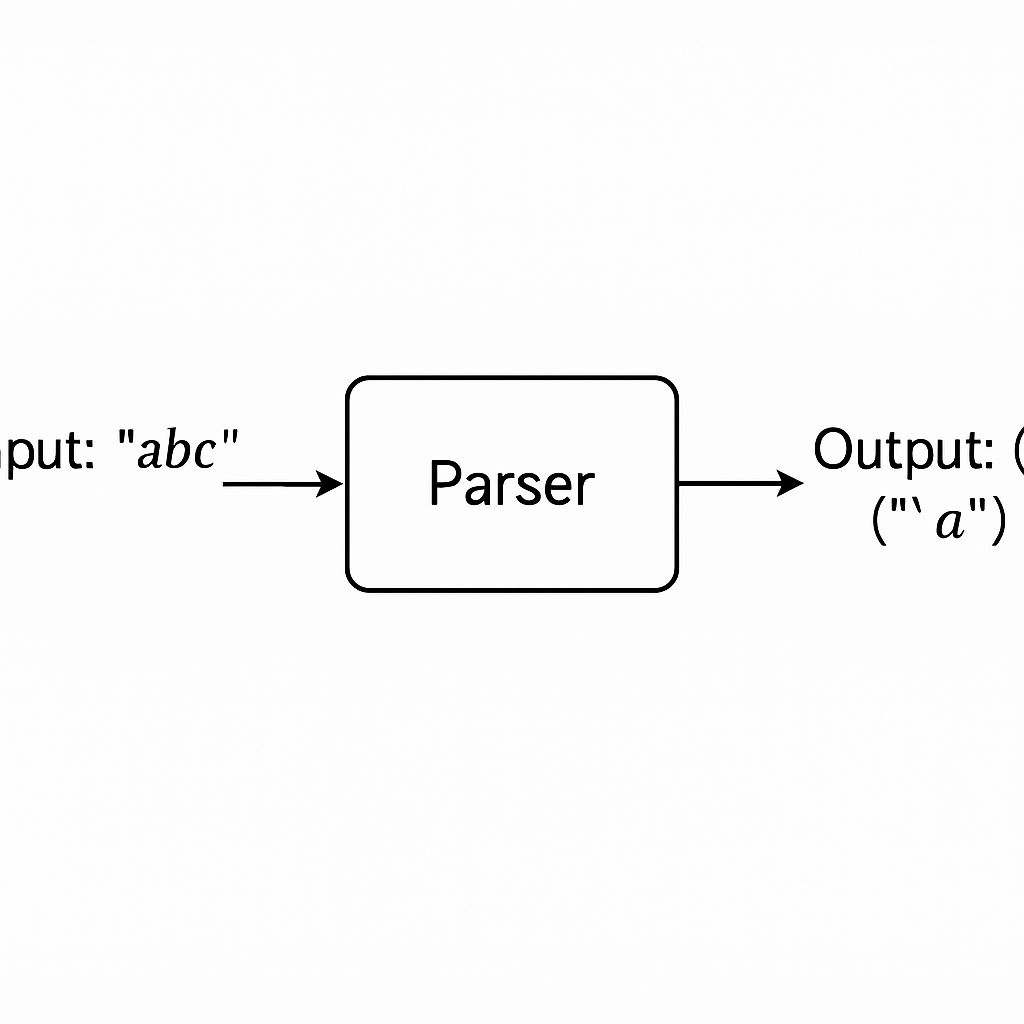

In [1]:
interface Parser<R: Any> {
    operator fun invoke(input: String): Pair<R?, String>
}

// 1. Create an operator function inside a Parser interface.

<div />

# Building the first parser

The first parser
- Takes a char
- Checks it agains a predicate

We create a function which takes the predicate as argument and returns an object implementing out Parser interface

```kotlin
fun char(predicate: (Char) -> Boolean) = object : Parser<Char> {
    override fun invoke(input: String): Pair<Char?, String> {
        TODO()
    }
}
```

We are going to use this to create a digit parser

```kotlin
val digit = char { TODO() }
```
#

#

#

In [2]:
val EoT = '\u0003'
fun char(predicate: (Char) -> Boolean) = object : Parser<Char> {
    override fun invoke(input: String): Pair<Char?, String> {
        val ch = input.firstOrNull() ?: EoT
        return when {
            predicate(ch) -> ch to input.drop(1)
            else -> null to input
        }
    }
}

// 2. Implement the parser function.
// when the first character matches the predicate return first and remainder
// else return null and original input
// If no more input return EoT

In [3]:
val digit = char { it in '0'..'9' }

// 3. Use char parser to check for digit range

In [4]:
digit("123")

// 4. Use the digit parser to parse "123"

(1, 23)

In [5]:
digit("abc")

// 5. Use the digit parser to parse "abc" to see it return null

(null, abc)

<div />

# A small sidestep into Notebook Renders

A notebook render is a function you can register for a certain Class to change the way the result is show in the notebook. You can output to different formats (Plain text, HTML, SVG, Jpeg, ...)


I'm going to register a render for Pair, which renders a small table with the following
- Parsed result
- Type of the result
- Remainder of the input

#
#
#
#
#

In [6]:
val htmlStateRenderer = createRenderer<Pair<*, *>> {
    var (parsed, type) = when (val f = it.first) {
        null -> Pair("null", "")
        is Unit -> Pair("Unit", "")
        is List<*> -> if (f.isNotEmpty()) Pair(f.toString(), "List&lt;${f[0]!!::class.simpleName}&gt;") else Pair("[]", "List<Any>")
        else -> Pair(f.toString(), f::class.simpleName)
    }
    val html = """<table><tr><th>parsed</th><th>type</th><th>remainder</th></tr>
    <tr><td>${parsed}</td><td>${type}</td><td>"${it.second}"</td></tr><table>"""
    mimeResult(
        MimeTypes.HTML to html,
        MimeTypes.PLAIN_TEXT to """($parsed: $type, "${it.second}")"""
    )
}
notebook.renderersProcessor.registerWithoutOptimizing(htmlStateRenderer)

//Check previous outputs again

<div />

<div style="position: absolute; top: 400px; right: 150px">
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/parser_combinator.svg" />


</div>

# What is a combinator (in a parser combinator)

A combinator is a parser which uses one or more other parser to create a more complex parser. There are different kind of combinators:

- Repeat parsers (e.g., parse a list of items)
- Sequence parsers (e.g., parse A followed by B)
- Transform results (e.g., convert parsed strings into numbers)
- Choose between alternatives (e.g., parse A or B)

#
#
#
#
#
#
#
#
#
#
#



# Repeat parser combinator

Our first combinator is a repeat combinator. It will take one parser as argument and will keep running this on the input string until the parser fails. The successful results will be returned as a List.

```kotlin
fun <R: Any> repeat(parser: Parser<out R>) = object : Parser<List<R>> {
    override fun invoke(input: String): Pair<List<R>?, String> {
        TODO()
    }
}
```

#

#

#

#

In [9]:
fun <R: Any> repeat(parser: Parser<out R>) = object : Parser<List<R>> {
    override fun invoke(input: String): Pair<List<R>?, String> {
        val result = mutableListOf<R>()
        var current = input

        while (true) {
            val (parsed, remainder) = parser.invoke(current)
            when (parsed) {
                null -> break
                else -> {
                    result += parsed
                    current = remainder
                }
            }
        }
        return result.toList() to current
    }
}

// 6. Add the while true loop. Invoke the parser.
// when parsed is null break
// else add parsed to result and set current to remainder.

In [10]:
val number = repeat(digit)
number("123abc")

// 7. Define a number parse, repeating digits.
// Check new parser against "123abc"

parsed,type,remainder
"[1, 2, 3]",List<Char>,"""abc"""


<div />

# Transformation parser combinator

Since combinators might not always return the structure as we want it, we define a combinator to transform/map the result.
It is defined as an extension on parser and takes a map function as argument

Without transformation
```kotlin
val number = repeat(digit)
number("123")

// gives List<Char> ['1', '2', '3']
```

Transform parser
```kotlin
infix fun <R: Any, S: Any> Parser<R>.map(func: (R) -> S)
```

With transformation
```kotlin
val number = repeat(digit) map { it.joinToString("").toInt() }
number("123")

// gives Int 123
```

#

#

In [11]:
infix fun <R: Any, S: Any> Parser<R>.map(func: (R) -> S) = object : Parser<S> {
    override fun invoke(input: String): Pair<S?, String> {
        val (parsed, remainder) = this@map.invoke(input)
        return when (parsed) {
            null -> parsed to input
            else -> func(parsed) to remainder
        }
    }
}

// 8. invoke parser as parsed and remainder. When parsed is not null, give parsed to func and return Pair with remainder

In [12]:
val number = repeat(digit) map { it.joinToString("").toInt() }
number("123abc")


parsed,type,remainder
123,Int,"""abc"""


<div />

<div style="position: absolute; top: 400px; right: 100px">
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/json_string_parser.svg" />
</div>

# The JSON string

- What is the JSON string? It's a sequence of
    - double qoute
    - zero or more other characters
    - another double qoute.
- Data class to hold the actual characters as a string
- Single char parser
- Quote parser
- Sequence parser

#
#
#
#
#
#
#
#
#
#
#

In [13]:
interface JSONValue
data class JSONString(val value: String) : JSONValue

In [14]:
fun char(char: Char) = char { it == char }

// 9. Add char parser with predicate to check if it matches given char

In [15]:
val doubleQoute = char('"')
doubleQoute("\"abc")

parsed,type,remainder
"""",Char,"""abc"""


In [17]:
fun <R: Any> seq(vararg parsers: Parser<out R>) = object : Parser<List<R>> {
    override fun invoke(input: String): Pair<List<R>?, String> {
        val result = mutableListOf<R>()
        var current = input
        for (parser in parsers) {
            val (parsed, remainder) = parser.invoke(current)
            when (parsed) {
                null -> return null to input
                else -> {
                    result += parsed
                    current = remainder
                }
            }
        }
        return result.toList() to current
    }
}

// 10. Copy repeat parser, change name
// Changed to varargs and makes plural
// Change while into for
// Change when null return empty null pair

In [18]:
val jsonStringValue = repeat(char { it != '"' })
val jsonString = seq(doubleQoute, jsonStringValue, doubleQoute)
jsonString((""""abc": 123 """))


parsed,type,remainder
"["", [a, b, c], ""]",List<Char>,""": 123 """


In [19]:
val jsonStringValue = repeat(char { it != '"' }) map { it.joinToString("") }
val jsonString = seq(doubleQoute, jsonStringValue, doubleQoute) map { it[1]}
jsonString((""""abc": 123 """))

// 11. Add map to jsonStringValue to join it and add it to JSONString
//     Add map to take middle part

parsed,type,remainder
abc,String,""": 123 """


<div />

# The ignore parser combinator

Because some parts are not interesting we build an ignore parser

- Define ignore parser
- Redefine single char parser
- Redefine doubleQoute parser
- Create "and" helper functions

#
#
#
#
#

In [20]:
fun <R: Any> Parser<R>.ignore() = this.map { Unit }

In [21]:
fun char(char: Char) = char { it == char }.ignore()

In [22]:
val doubleQoute = char('"')
doubleQoute("\"abc")

parsed,type,remainder
Unit,,"""abc"""


In [23]:
@JvmName("and1")
infix fun <R: Any> Parser<Unit>.and(other: Parser<R>) = seq(this, other).map { it[1] as R }
@JvmName("and2")
infix fun <R: Any> Parser<R>.and(other: Parser<Unit>) = seq(this, other).map { it[0] as R }
@JvmName("and3")
infix fun <R: Any, S: Any> Parser<R>.and(other: Parser<S>) = seq(this, other).map { it[0] as R to it[1] as S }
@JvmName("and4")
infix fun Parser<Unit>.and(other: Parser<Unit>) = seq(this, other).map { Unit }

In [24]:
val jsonStringValue = repeat(char { it != '"' }).map { JSONString(it.joinToString("")) }
val jsonString = doubleQoute and jsonStringValue and doubleQoute
jsonString((""""abc": 123 """))

// 12. Add json string using and

parsed,type,remainder
JSONString(value=abc),JSONString,""": 123 """


<div />

<div style="position: absolute; top: 450px; right: 100px">
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/simple_knife.webp" width="300px"/>
</div>

# The Swiss army knife Parser

Create a simple DSL to run parsers. Get the parsed data, manupilate it and return it

```kotlin
interface CombiDSL {
    operator fun <R: Any> Parser<R>.invoke() : R
}
```

Works by calling the parser. If it succeeds return the value, if it fails throw an exception. Return the value returned by the code block

#

#

#

#

#


In [25]:
interface CombiDSL {
    operator fun <R: Any> Parser<R>.invoke() : R
}

class CombiDSLImpl(var input: String) : CombiDSL {
    override fun <R: Any> Parser<R>.invoke(): R {
        val (parsed, remainder) = this(input)
        return when (parsed) {
            null -> error("No match")
            else -> {
                input = remainder
                parsed
            }
        }
    }
}

In [26]:
fun <R: Any> combi(init: CombiDSL.() -> R) = object: Parser<R> {
    override fun invoke(input: String): Pair<R?, String> {
        val dsl = CombiDSLImpl(input)
        return try {
            init.invoke(dsl) to dsl.input
        } catch(e: Exception) {
            null to input
        }
    }
}

In [27]:
val jsonString = combi {
    doubleQoute()
    val chars = repeat(char { it != '"'})()
    doubleQoute()
    JSONString(chars.joinToString(""))
}

jsonString(""""abc": 1""")

// 13. Use three parsers: 2x doubleQoute, 1x repeat char not double qoute. Return JSONString of joined chars

parsed,type,remainder
JSONString(value=abc),JSONString,""": 1"""


<div />

<div style="position: absolute; top: 500px; right: 100px">
<img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/big_knife.webp" width="300px"/>
</div>

# The extended Swiss army knife Parser

Extend the combi parser to give it possibility to handle failures more flexible:

Run function which returns the result of a parser (to handle failures differently)
```kotlin
    fun <R: Any> Parser<R>.run() : R?
```
Fail function to return a failure from the combinator
```kotlin
    fun fail() : Nothing
```

#
#
#
#
#
#
#
#
#
#

In [28]:
interface CombiDSL {
    operator fun <R: Any> Parser<R>.invoke() : R
    fun <R: Any> Parser<R>.run() : R?
    fun fail() : Nothing
}

class CombiDSLImpl(var input: String) : CombiDSL {
    override fun <R: Any> Parser<R>.invoke(): R {
        val (parsed, remainder) = this(input)
        return when (parsed) {
            null -> fail()
            else -> {
                input = remainder
                parsed
            }
        }
    }
    override fun <R: Any> Parser<R>.run(): R? {
        val (parsed, remainder) = this(input)
        input = remainder
        return parsed
    }
    override fun fail() = error("No match")
}

In [29]:
fun <R: Any> combi(init: CombiDSL.() -> R) = object: Parser<R> {
    override fun invoke(input: String): Pair<R?, String> {
        val dsl = CombiDSLImpl(input)
        return try {
            init.invoke(dsl) to dsl.input
        } catch(e: Exception) {
            null to input
        }
    }
}

In [27]:
fun <R: Any> repeat(parser: Parser<out R>) = combi {
    val result = mutableListOf<R>()
    while (true) {
        when (val parsed = parser.run()) {
            null -> break
            else -> result += parsed
        }
    }
    result.toList()
}

// 14. Copy original repeat and adapt.
// replace object and function override with combi
// remove trailing } and remove indent
// remove original invoke
// add parser run to when subject
// remove remainder of else
// return result as list (remove return)

In [28]:
fun <R: Any> seq(vararg parsers: Parser<out R>) = combi {
    val result = mutableListOf<R>()
    for (parser in parsers) {
        when (val parsed = parser.run()) {
            null -> fail()
            else -> result += parsed
        }
    }
    result.toList()
}

infix fun <R: Any, S: Any> Parser<R>.map(func: (R) -> S) = combi {
    when (val parsed = this@map.run()) {
        null -> fail()
        else -> func(parsed)
    }
}

In [29]:
val number = repeat(digit) map { it.joinToString("").toInt() }
number("123abc")

parsed,type,remainder
123,Int,"""abc"""


# The choose parser

Takes multiple parsers and returns the result of the first one that succeeds or fail if all fail.


In [30]:
fun <R: Any> oneOf(vararg parsers: Parser<out R>) = combi {
    for (parser in parsers) {
        when (val parsed = parser.run()) {
            null -> {}
            else -> return@combi parsed
        }
    }
    fail()
}

// 15. Copy the seq implementation
// rename
// remove list
// change null to empty block
// change else to return@combi parsed
// fail after loop

In [31]:
val oneOfabc = oneOf(char('a'), char('b'), char('c'))
oneOfabc("abc")

parsed,type,remainder
Unit,,"""bc"""


In [32]:
oneOfabc("def")

parsed,type,remainder
null,,"""def"""


# Another repeat combinator - separate by

- If you input contains a list of data which is separated by something else


In [33]:
infix fun <R: Any, S: Any> Parser<R>.sepBy(separator: Parser<S>) = combi {
    val result = mutableListOf<R>()
    when (val e = this@sepBy.run()) {
        null -> return@combi emptyList()
        else -> result += e
    }
    while (true) {
        when (separator.run()) {
            null -> break
            else -> {}
        }
        when (val e = this@sepBy.run()) {
            null -> fail()
            else -> result += e
        }
    }
    result.toList()
}

In [34]:
val test = digit sepBy char(',')
test("1,2,345")

parsed,type,remainder
"[1, 2, 3]",List<Char>,"""45"""


<div />

<div style="float:right">
<div style="float: right; padding: 50px 100px"><img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/json_card.png" />
</div>
</div>

# Putting it all together

- Json data classes
- Fixed parts
- Building the parser from the specs

#

#

#

#

#

#




In [35]:
object JSONNull : JSONValue

data class JSONBool(val value: Boolean) : JSONValue
data class JSONNumber(val value: Int) : JSONValue
data class JSONArray(val elements: List<JSONValue>) : JSONValue
data class JSONObject(val elements: Map<JSONString, JSONValue>) : JSONValue

In [36]:
val ws = repeat(oneOf(char(' '), char('\t'), char('\r'), char('\n'))).ignore()

val leftCurly = ws and char('{') and ws
val rightCurly = ws and char('}') and ws
val leftSquare = ws and char('[') and ws
val rightSquare = ws and char(']') and ws
val colon = ws and (char(':')) and ws
val comma = ws and (char(',')) and ws


In [39]:
val jsonNull = (char('n') and char('u') and char('l') and char('l')).map { JSONNull }
val jsonTrue = (char('t') and char('r') and char('u') and char('e')).map { JSONBool(true) }
val jsonFalse = (char('f') and char('a') and char('l') and char('s') and char('e')).map { JSONBool(false) }

val jsonNumber = number map { JSONNumber(it) }

val jsonStringValue = repeat(char { it != '"' }).map { JSONString(it.joinToString("")) }
val jsonString = doubleQoute and jsonStringValue and doubleQoute

val jsonValue : Parser<JSONValue> = oneOf(jsonNull, jsonTrue, jsonFalse, jsonNumber, jsonString, ref(::jsonArray), ref(::jsonObject))

val jsonArray = leftSquare and (jsonValue sepBy comma).map { JSONArray(it) } and rightSquare

val pair = combi {
    val key = jsonString()
    colon()
    key to jsonValue()
}

val jsonObject = leftCurly and (pair sepBy comma).map { JSONObject(it.toMap()) } and rightCurly

val json = ws and jsonValue and ws

In [40]:
json(""" true """)

parsed,type,remainder
JSONBool(value=true),JSONBool,""""""


In [41]:
json(""""abc"  """)

parsed,type,remainder
JSONString(value=abc),JSONString,""""""


In [42]:
json(""" 1234 """)

parsed,type,remainder
JSONNumber(value=1234),JSONNumber,""""""


In [43]:
json(""" [1, "abc", true] """)

// Check with jsonArray

parsed,type,remainder
"JSONArray(elements=[JSONNumber(value=1), JSONString(value=abc), JSONBool(value=true)])",JSONArray,""""""


# The final parser combinator ref

Since kotlin can't reference uninitialized variables, we add a ref parser to handle that.

In [38]:
fun <R: Any> ref(parserRef: kotlin.reflect.KProperty0<Parser<R>>) = combi {
    parserRef.get()() as R
}

// Add references to the jsonValue
// , ref(::jsonArray), ref(::jsonObject)

In [56]:
json("""{
    "conference" : "Kotlin Dev Days",
    "year" : 2025,
    "talk" : "Simple Parser Combinator in Kotlin",
    "audienceIsSuper": true,
    "author": {
        "firstName": "Elmar",
        "lastName": "Wachtmeester"
    }
}""")


JSONObject(elements={JSONString(value=conference)=JSONString(value=Kotlin Dev Days), JSONString(value=year)=JSONNumber(value=2025), JSONString(value=talk)=JSONString(value=Simple Parser Combinator in Kotlin), JSONString(value=audienceIsSuper)=JSONBool(value=true), JSONString(value=author)=JSONObject(elements={JSONString(value=firstName)=JSONString(value=Elmar), JSONString(value=lastName)=JSONString(value=Wachtmeester)})})

<div />

# Real world parser differences

- Result class
    - Success and Failure
    - Subresult tree
- Context
    - Handles different input types, provides tokens
        - String
        - List<Token>
        - ByteArray
    - Create Result objects
    - Stores intermediate values
- Combi parser uses special exception
- Way more utility classes
- Special easy handling for text parsing
- Recursion detection



In [45]:
interface Context<T> {
    fun token(): Pair<T, Context<T>>
    fun <R> success(value: R, subResults: List<Result<*>> = emptyList()) : Success<R>
    fun failure(error: Any, subResults: List<Result<*>> = emptyList()): Failure
}

sealed interface Result<out R> {
    val subResults: List<Result<*>>
}

class Success<R>(val value: R, override val subResults: List<Result<*>>) : Result<R>
class Failure(val error: Any, override val subResults: List<Result<*>>) : Result<Nothing>

interface Parser<T, R> {
    operator fun invoke(input: Context<T>): Pair<Result<R>, Context<T>>
}

# Real world applications
- Parsing input data
- Parsing file formats
- Parsing binary file formats
- Compilers
- DSLs

<div style="float:right">
<div style="float: right"><img src="https://github.com/w8mr/parsek/raw/refs/heads/kotlin-dev-days-2025/kdd-25/link.svg" >
<center><h3><a href="https://w8mr.nl/kdd-25">w8mr.nl/kdd-25</a></h3></center>
<center><h3>Live Notebook</br>Presentation</h3></center>
</div>
</div>

#

# Questions?

#

#

#

Website: [w8mr.nl](https://w8mr.nl) \
Email: [elmar@w8mr.nl](mailto:elmar@w8mr.nl) \
GitHub: [github.com/w8mr/parsek](https://github.com/w8mr/parsek) \
LinkedIn: [www.linkedin.com/in/elmarwachtmeester/](https://www.linkedin.com/in/elmarwachtmeester/) \
X: [x.com/_w8mr](https://x.com/_w8mr) \
#
#

# Examples to try out

### Using new interfaces for JSON parser


In [46]:
open abstract class AbstractContext<T>() : Context<T> {
    override fun <R> success(value: R, subResults: List<Result<*>>) =
        Success<R>(value, subResults)
    override fun failure(error: Any, subResults: List<Result<*>>) =
        Failure(error, subResults)

}

data class StringContext(val input: String, val index: Int = 0) : AbstractContext<Char>() {
    override fun token(): Pair<Char, StringContext> =
        input[index] to StringContext(input, index + 1)
}

operator fun <R> Parser<Char, R>.invoke(input: String) = when (val result = this(StringContext(input)).first) {
    is Success -> result.value
    is Failure -> error(result.error.toString())
    else -> error("Should not happen")
}

fun <R> Parser<Char, R>.run(input: String) = this(StringContext(input))

In [47]:
val htmlStateRenderer = createRenderer<Pair<Result<*>, Context<*>>> {
    fun resultToString(result: Result<*>): String =
        when (result) {
            is Failure -> {
                "<li>Failure: ${result.error}<ul>${result.subResults.map(::resultToString).map { "$it" }.joinToString("")}</ul></li>"
            }
            is Success<*> -> {
                var (parsed, type) = when (val f = result.value) {
                    null -> Pair("null", "")
                    is Unit -> Pair("Unit", "")
                    is List<*> -> if (f.isNotEmpty()) Pair(f.toString(), "List&lt;${f[0]!!::class.simpleName}&gt;") else Pair("[]", "List<Any>")
                    else -> Pair(f.toString(), f::class.simpleName)
                }
                "<li>Success: $parsed ($type}<ul>${result.subResults.map(::resultToString).map { "$it" }.joinToString("")}</ul></li>"
            }
            else -> error("Should not happen")
        }

    val html = """<ul>${resultToString(it.first)}<li>Remainder: ${it.second.toString()}</li></ul>"""
    mimeResult(
        MimeTypes.HTML to html,
        MimeTypes.PLAIN_TEXT to """(${it.first}, "${it.second}")"""
    )
}
notebook.renderersProcessor.registerWithoutOptimizing(htmlStateRenderer)

In [48]:
val EoT = '\u0003'
fun char(predicate: (Char) -> Boolean) = object : Parser<Char, Char> {
    override fun invoke(input: Context<Char>): Pair<Result<Char>, Context<Char>> {
        val (ch, remainder) = input.token()
        when {
            predicate(ch) -> return Pair(input.success(ch), remainder)
            else -> return Pair(input.failure("Character does not meet predicate"), input)
        }
    }
}

val digit = char { it in '0'..'9' }

digit("123")

1

In [49]:
interface CombiDSL<T> {
    operator fun <R> Parser<T, R>.invoke() : R
    fun <R> Parser<T, R>.run() : Result<R>
    fun fail() : Nothing
}

class CombiDSLImpl<T>(var input: Context<T>, val subResults: MutableList<Result<*>>) : CombiDSL<T> {
    override fun <R> Parser<T, R>.invoke(): R {
        val (parsed, context) = this(input)
        subResults += parsed
        return when (parsed) {
            is Success<R> -> {
                input = context
                parsed.value
            }
            is Failure -> fail()
            else -> error("Should not happen")
        }
    }
    override fun <R> Parser<T, R>.run(): Result<R> {
        val (parsed, remainder) = this(input)
        subResults += parsed
        input = remainder
        return parsed
    }
    override fun fail() = error("No match")
}

fun <T, R> combi(init: CombiDSL<T>.() -> R) = object: Parser<T, R> {
    override fun invoke(input: Context<T>): Pair<Result<R>, Context<T>> {
        val subResults = mutableListOf<Result<*>>()
        val dsl = CombiDSLImpl<T>(input, subResults)
        return try {
            Pair(input.success(init.invoke(dsl), subResults), dsl.input)
        } catch(e: Exception) {
            Pair(input.failure("Combinator failed", subResults), input)
        }
    }
}

fun <T, R> repeat(parser: Parser<T, R>) = combi {
    val result = mutableListOf<R>()
    while (true) {
        when (val parsed = parser.run()) {
            is Failure -> break
            is Success<R> -> result += parsed.value
            else -> error("Should not happen")
        }
    }
    result.toList()
}

fun <T, R> seq(vararg parsers: Parser<T, out R>) = combi {
    val result = mutableListOf<R>()
    for (parser in parsers) {
        when (val parsed = parser.run()) {
            is Failure -> fail()
            is Success<R> -> result += parsed.value
            else -> error("Should not happen")
        }
    }
    result.toList()
}

infix fun <T, R, S> Parser<T, R>.map(func: (R) -> S) = combi {
    when (val parsed = this@map.run()) {
        is Failure -> fail()
        is Success<R> -> func(parsed.value)
        else -> error("Should not happen")
    }
}

val number = repeat(digit) map { it.joinToString("").toInt() }

number.run("123abc")

(Line_46_jupyter$Success@5df98766, "StringContext(input=123abc, index=3)")

In [50]:
fun <T> Parser<T, *>.ignore() = this.map { Unit }
fun char(char: Char) = char { it == char }.ignore()

val doubleQoute = char('"')

@JvmName("and1")
infix fun <T, R> Parser<T, Unit>.and(other: Parser<T, R>) = seq(this, other).map { it[1] as R }
@JvmName("and2")
infix fun <T, R> Parser<T, R>.and(other: Parser<T, Unit>) = seq(this, other).map { it[0] as R }
@JvmName("and3")
infix fun <T, R, S> Parser<T, R>.and(other: Parser<T, S>) = seq(this, other).map { it[0] as R to it[1] as S }
@JvmName("and4")
infix fun <T> Parser<T, Unit>.and(other: Parser<T, Unit>) = seq(this, other).map { Unit }

In [51]:
fun <T, R> oneOf(vararg parsers: Parser<T, out R>) = combi {
    for (parser in parsers) {
        when (val parsed = parser.run()) {
            is Failure -> {}
            is Success<R> -> return@combi parsed.value
            else -> error("Should not happen")
        }
    }
    fail()
}

infix fun <T, R, S> Parser<T, R>.sepBy(separator: Parser<T, S>) = combi {
    val result = mutableListOf<R>()
    when (val e = this@sepBy.run()) {
        is Failure -> return@combi emptyList()
        is Success<R> -> result += e.value
        else -> error("Should not happen")
    }
    while (true) {
        when (separator.run()) {
            is Failure -> break
            is Success<S> -> {}
            else -> error("Should not happen")
        }
        when (val e = this@sepBy.run()) {
            is Failure -> fail()
            is Success<R> -> result += e.value
            else -> error("Should not happen")
        }
    }
    result.toList()
}

fun <T, R> ref(parserRef: kotlin.reflect.KProperty0<Parser<T, R>>) = combi {
    parserRef.get()()
}

In [52]:
val ws = repeat(oneOf(char(' '), char('\t'), char('\r'), char('\n'))).ignore()

val leftCurly = ws and char('{') and ws
val rightCurly = ws and char('}') and ws
val leftSquare = ws and char('[') and ws
val rightSquare = ws and char(']') and ws
val colon = ws and (char(':')) and ws
val comma = ws and (char(',')) and ws


In [53]:
val jsonNull = (char('n') and char('u') and char('l') and char('l')) map { JSONNull }
val jsonTrue = (char('t') and char('r') and char('u') and char('e')) map { JSONBool(true) }
val jsonFalse = (char('f') and char('a') and char('l') and char('s') and char('e')) map { JSONBool(false) }

val jsonNumber = number map { JSONNumber(it) }

val jsonStringValue = repeat(char { it != '"' }).map { JSONString(it.joinToString("")) }
val jsonString = doubleQoute and jsonStringValue and doubleQoute

val jsonValue : Parser<Char, JSONValue> = oneOf(jsonNull, jsonTrue, jsonFalse, jsonNumber, jsonString, ref(::jsonArray), ref(::jsonObject))

val jsonArray = leftSquare and (jsonValue sepBy comma).map { JSONArray(it) } and rightSquare

val pair = combi {
    val key = jsonString()
    colon()
    key to jsonValue()
}

val jsonObject = leftCurly and (pair sepBy comma).map { JSONObject(it.toMap()) } and rightCurly

val json = ws and jsonValue and ws

In [54]:
json("""{
    "conference" : "Kotlin Dev Days",
    "year" : 2025,
    "talk" : "Simple Parser Combinator in Kotlin",
    "audienceIsSuper": true,
    "author": {
        "firstName": "Elmar",
        "lastName": "Wachtmeester"
    }
}""")

JSONObject(elements={JSONString(value=conference)=JSONString(value=Kotlin Dev Days), JSONString(value=year)=JSONNumber(value=2025), JSONString(value=talk)=JSONString(value=Simple Parser Combinator in Kotlin), JSONString(value=audienceIsSuper)=JSONBool(value=true), JSONString(value=author)=JSONObject(elements={JSONString(value=firstName)=JSONString(value=Elmar), JSONString(value=lastName)=JSONString(value=Wachtmeester)})})